# Task 1

# 1.Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# 2.Load the dataset.

In [2]:
df=pd.read_csv('DS2_C6_S1_Insurance_Data_Challenge.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Task 2

# Perform EDA to answer the following questions.

# 1.How smoking habit is distributed features of policyholders.

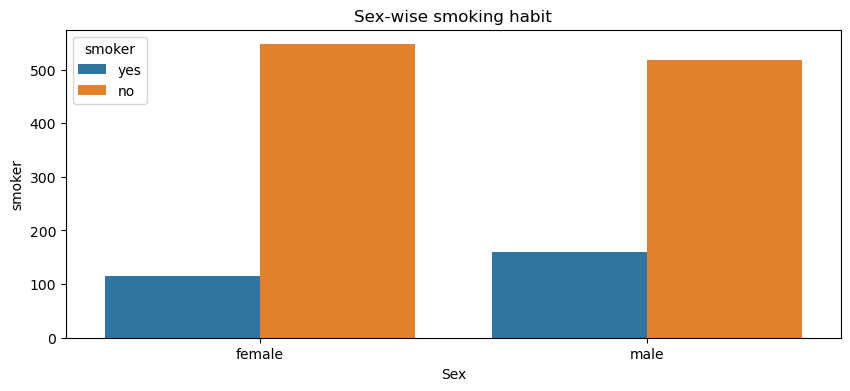

In [5]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['sex'],hue=df['smoker'])
plt.title('Sex-wise smoking habit')
plt.xlabel('Sex')
plt.ylabel('smoker');

# b.How does obesity exist among smokers and non-smoker policyholders?

In [6]:
df['new_bmi']=df['bmi'].apply(lambda x: 'yes' if x>30 else 'no')

In [7]:
df

,age,sex,bmi,children,smoker,region,charges,new_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,yes
1334,18,female,31.920,0,no,northeast,2205.98080,yes
1335,18,female,36.850,0,no,southeast,1629.83350,yes
1336,21,female,25.800,0,no,southwest,2007.94500,no


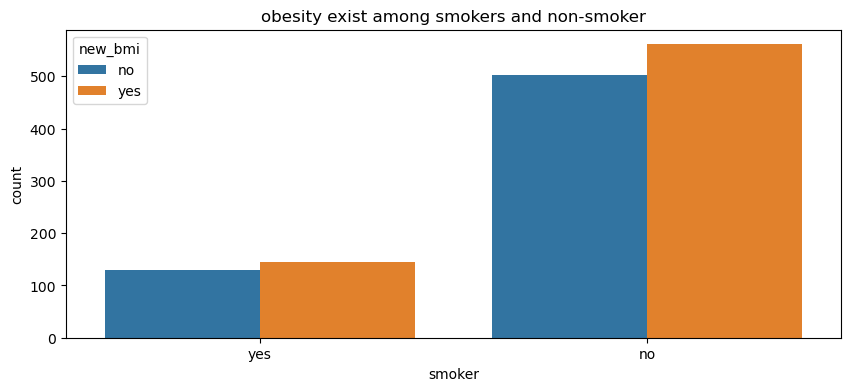

In [8]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='smoker',hue='new_bmi')
plt.title('obesity exist among smokers and non-smoker');

# c.How do charges are distributed among regions?

<Figure size 1000x400 with 0 Axes>

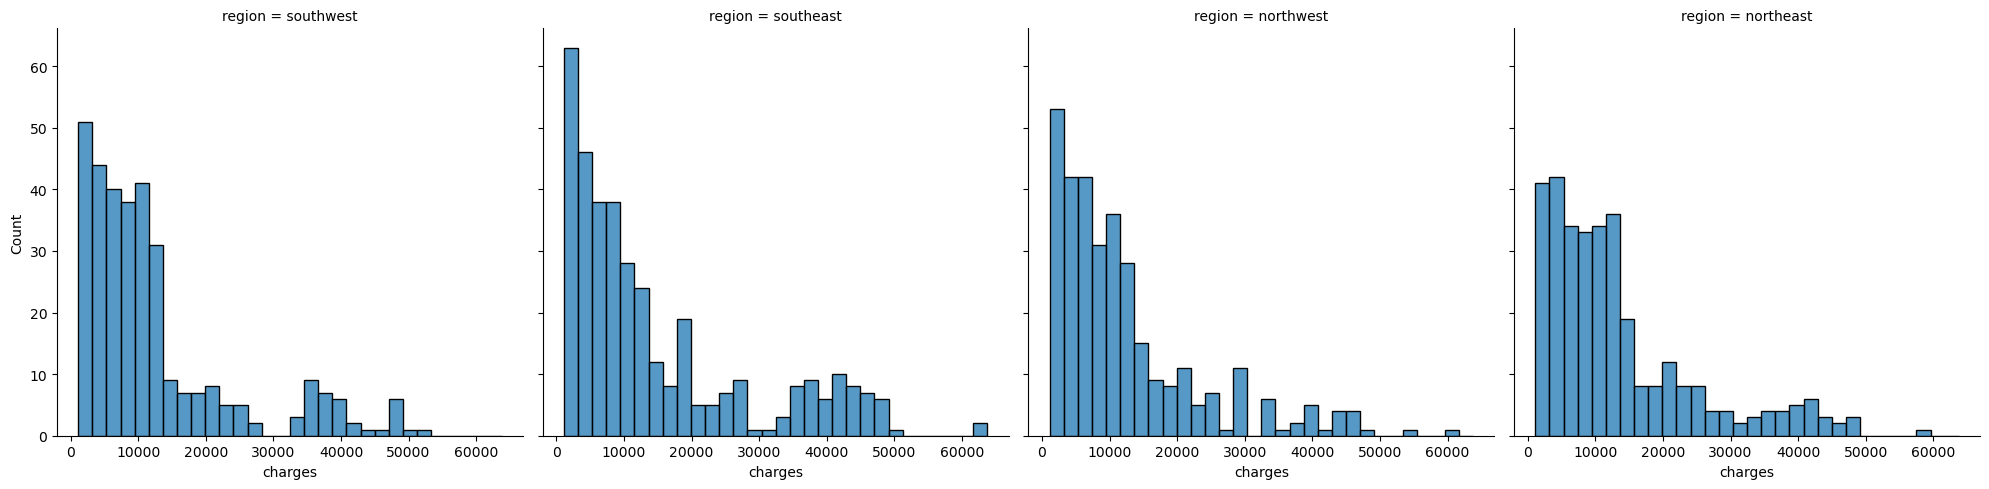

In [9]:
plt.figure(figsize=(10,4))
sb.displot(data=df,col='region',x='charges');

In [10]:
df

,age,sex,bmi,children,smoker,region,charges,new_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,yes
1334,18,female,31.920,0,no,northeast,2205.98080,yes
1335,18,female,36.850,0,no,southeast,1629.83350,yes
1336,21,female,25.800,0,no,southwest,2007.94500,no


# d.How do charges are distributed among genders?

<Figure size 1000x400 with 0 Axes>

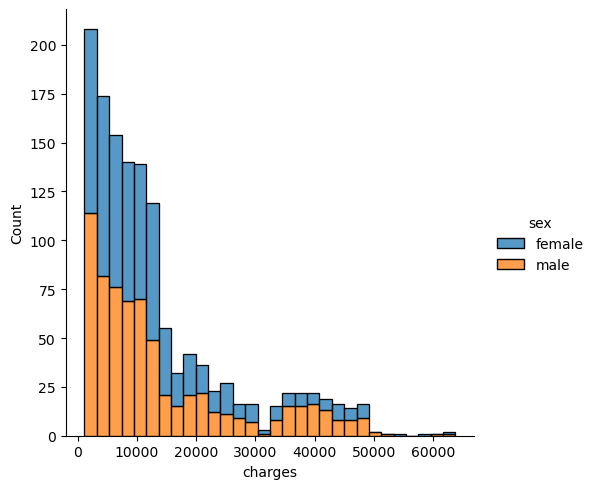

In [11]:
plt.figure(figsize=(10,4))
sb.displot(data=df,hue='sex',x='charges',multiple = 'stack');

# 3.Prepare the dataset for unsupervised methods.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   new_bmi   1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
new_bmi     0
dtype: int64

In [15]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

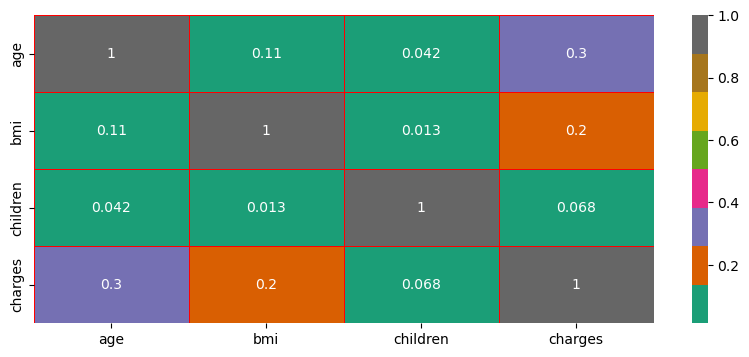

In [16]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='r',linewidths=.6,cmap='Dark2')

In [17]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['sex']=a.fit_transform(df['sex'])
df['smoker']=a.fit_transform(df['smoker'])
df['region']=a.fit_transform(df['region'])
df['new_bmi']=a.fit_transform(df['new_bmi'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
 7   new_bmi   1338 non-null   int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 62.8 KB


In [44]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=scale.fit_transform(df)
df1=pd.DataFrame(df1)
df1

,0,1,2,3,4,5,6,7
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584,-1.055341
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689,0.947561
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675,0.947561
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843,-1.055341
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802,-1.055341
...,...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551,0.947561
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002,0.947561
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596,0.947561
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362,-1.055341


# Task 3

# 1.Apply the learnerd dimension reduction algorithms.

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
pc_data1=pca.fit(df1)
pc_data1

PCA(n_components=7)

In [21]:
pc_data1.explained_variance_ #capture the maximum varience of 11 components.

array([2.09581659, 1.63674113, 1.05429924, 1.00653923, 0.97079415,
       0.91132736, 0.19927128])

In [22]:
sum(pc_data1.explained_variance_ratio_) #capture the sum of maximum varience of 11 components in ratio.

0.9836129367475386

In [23]:
var_ratio={}
for i in range(2,18):
    pca=PCA(n_components=i)
    pc_data1=pca.fit(df1)
    var_ratio[i]=sum(pc_data1.explained_variance_ratio_)
    
    
    

ValueError: n_components=9 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

In [ ]:
var_ratio

In [ ]:
pd.Series(var_ratio).plot(kind='line')

 The Best k-value is 5

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pc_data1=pca.fit(df1)
pc_data2=pca.fit_transform(df1)

In [25]:
df2=pd.DataFrame(pc_data2)
df2

,0,1,2,3,4
0,-0.158059,1.535350,-1.371691,-0.946089,2.293891
1,-0.166830,-1.520673,-1.708498,0.550239,-0.105646
2,0.145042,-1.256050,-0.599083,1.915139,-0.120678
3,-1.115023,1.190009,-0.810190,-0.249493,-0.701421
4,-1.406615,0.032789,-0.991974,-0.216501,-0.809832
...,...,...,...,...,...
1333,0.489532,-0.608477,0.697802,1.649924,-1.125159
1334,-0.748190,-1.130690,-0.625782,-1.495547,-0.594084
1335,-0.149917,-1.874006,-0.956316,-1.129205,0.819851
1336,-1.888673,-0.287527,-0.747793,-0.707758,1.853263


# LDA

In [26]:
df

,age,sex,bmi,children,smoker,region,charges,new_bmi
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [29]:
x=df.drop(columns='smoker',axis=1)
y=df['smoker']

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda_data1=lda.fit(x,y)
lda_data2=lda.fit_transform(x,y)

In [31]:
lda_data2

array([[-1.92359459],
       [ 1.21077787],
       [ 1.33172078],
       ...,
       [ 1.3369167 ],
       [ 0.60304005],
       [-1.98970927]])

In [32]:
lda_data1.explained_variance_ratio_

array([1.])

In [33]:
sum(lda_data1.explained_variance_ratio_)

1.0

# 2.Determine which method is best suited for the dataset.

# Task 4

# Apply different clustering algorithm and compare model performance without and with reduced dimensions.

# AgglomerativeClustering without feature reduction.

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,12):
    ag=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_ag=ag.fit_predict(df1)
    print(k,silhouette_score(df1,y_ag))

2 0.2739079532711164
3 0.2397104449963003
4 0.25825883995090054
5 0.21567023762047371
6 0.19089501224521316
7 0.19783393527946022
8 0.2052123268990102
9 0.20500822104467697
10 0.19839841319675258
11 0.20266499687033646


The Best k-value is 2( 0.2739079532711164).

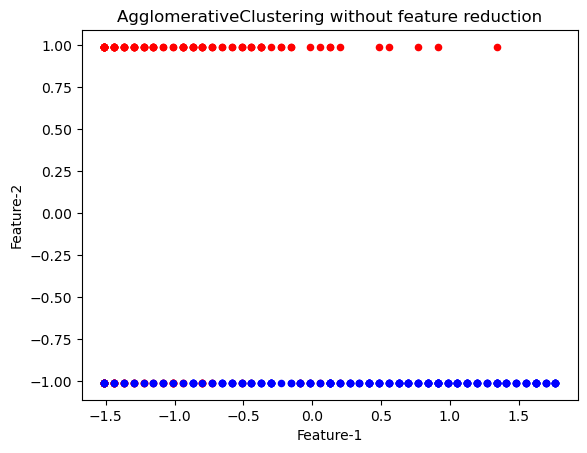

In [41]:
#df1=df1.to_numpy()
plt.scatter(df1[y_ag==0,0],df1[y_ag==0,1],s=20,c='r')
plt.scatter(df1[y_ag==1,0],df1[y_ag==1,1],s=20,c='b')
plt.title('AgglomerativeClustering without feature reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

# AgglomerativeClustering with feature reduction

In [182]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,12):
    ag=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_ag=ag.fit_predict(df2)
    print(k,silhouette_score(df2,y_ag))

2 0.4065234901113992
3 0.30480200744011554
4 0.30805691788332884
5 0.26729924967180185
6 0.23465724541809455
7 0.24202593280968263
8 0.2451659223341032
9 0.2404713820104144
10 0.24104254019598387
11 0.2424428995902657


The Best k-value is 2(0.4065234901113992).

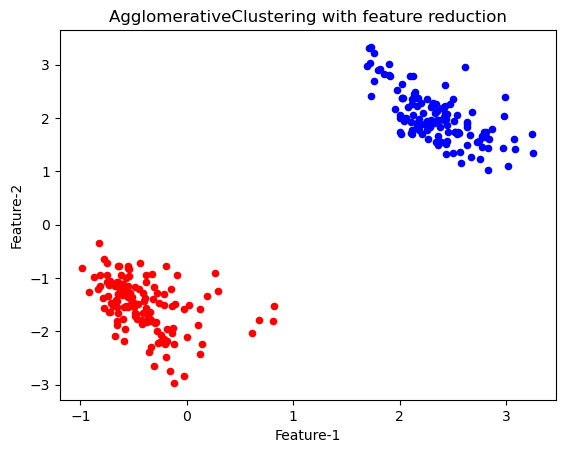

In [183]:
#df2=df2.to_numpy()
plt.scatter(df2[y_ag==0,0],df2[y_ag==0,1],s=20,c='r')
plt.scatter(df2[y_ag==1,0],df2[y_ag==1,1],s=20,c='b')
plt.title('AgglomerativeClustering with feature reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

# KMeans without feature reduction.

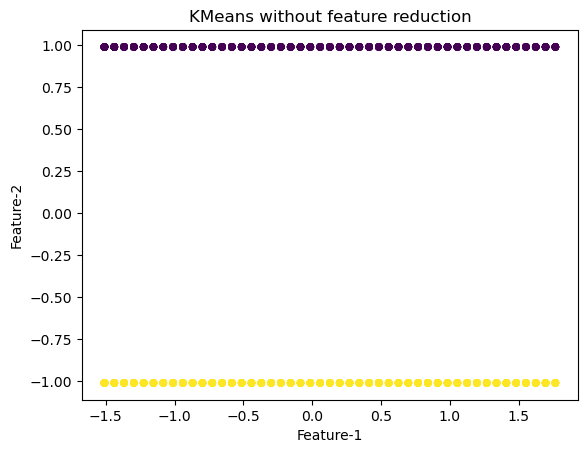

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=2)
km.fit(df1[[0,1]])
df1['km_labels']=km.labels_
plt.scatter(df1[0],df1[1],s=20,c=df1['km_labels'])
plt.title('KMeans without feature reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [46]:
print(silhouette_score(df1,df1['km_labels']))

0.1671922956487135


# KMeans with feature reduction.

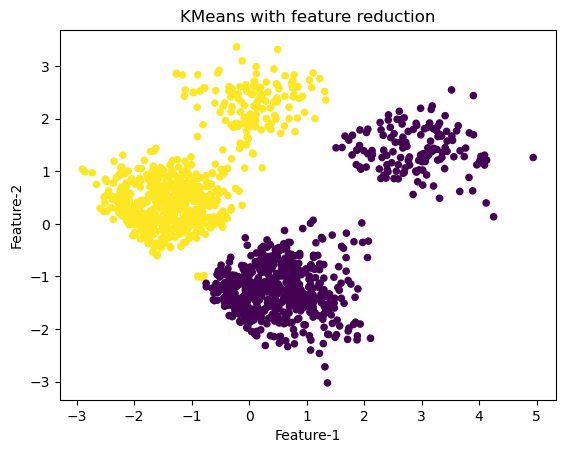

In [251]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=2)
km.fit(df2[[0,1]])
df2['km_labels']=km.labels_
plt.scatter(df2[0],df2[1],s=20,c=df2['km_labels'])
plt.title('KMeans with feature reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');


In [252]:
print(silhouette_score(df2,df2['km_labels']))

0.2711067584700736


Conclusion:-The silhouette_score of KMeans with feature reduction is getting high.

# DBSCAN without feature reduction.

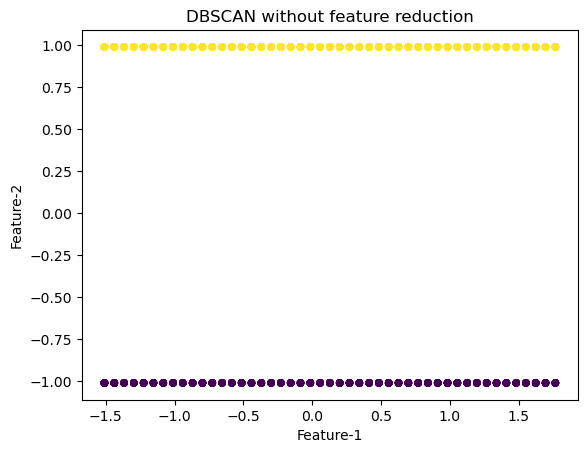

In [259]:
from sklearn.cluster import DBSCAN
from  sklearn.metrics import silhouette_score
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(df1[[0,1]])
df1['dbscan_labels']=dbscan.labels_
plt.scatter(df1[0],df1[1],s=20,c=df1['dbscan_labels'])
plt.title('DBSCAN without feature reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [260]:
print(silhouette_score(df1,df1['dbscan_labels']))

0.19051643986677574


# DBSCAN with feature reduction.

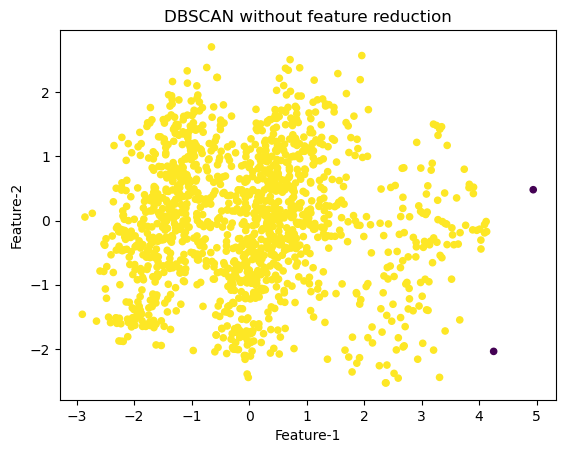

In [255]:
from sklearn.cluster import DBSCAN
from  sklearn.metrics import silhouette_score
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(df2[[0,2]])
df2['dbscan_labels']=dbscan.labels_
plt.scatter(df2[0],df2[2],s=20,c=df2['dbscan_labels'])
plt.title('DBSCAN without feature reduction')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2');

In [256]:
print(silhouette_score(df2,df2['dbscan_labels']))

0.3476171868077329


Conclusion:-The silhouette_score of DBSCAN with feature reduction is getting high.